In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spectral.io.envi as envi
from scipy.signal import argrelextrema
from pysptools.spectro import convex_hull_removal
from scipy.ndimage import median_filter
import spectral
import pickle
import os
import re
from csv import reader

In [3]:
#sourced from Bishop 2008 paper
#Reflectance and emission spectroscopy study of four groups of phyllosilicates: smectites, kaolinite-serpentines, chlorites and micas
class BishopPhyllosilicateSample:
    ##create constuctor i.e. _init_ function for the class
    def __init__(self,sampleID,paper,phyllosilicateType,phyllosilicateSpecies,bandCentres):
        #set variable to hold the sample id
        self.sampleID=sampleID
        #set variable to hold the source i.e. paper
        self.paper=paper
        #set variable to hold the mineral type
        self.phyllosilicateType=phyllosilicateType
        #set varibale to hold the mineral species
        self.phyllosilicateSpecies=phyllosilicateSpecies
        #set variable to hold the band centres
        self.bandCentres=bandCentres

In [4]:
#read the csv file
rows=[]
for row in reader(open("G:/Phyllosilicate absorption features - Sheet1.csv")):
    rows.append(row)


In [5]:
#create an array to hold the samples
allPhyllosilicateBishopSamples=[]
for i in range(len(rows)):
    #check if the row is a sample
    if len(rows[i][0])>0 and rows[i][0]!='Mineral Group':
        #get all band centres
        bandCentres=[]
        for j in range(2,11):
            if rows[i][j]!='':
                bandCentres.append((float)(rows[i][j]))
        #sort the list of band Centres
        bandCentres=np.array(sorted(bandCentres,key=float))
        #create an object
        currentSample=BishopPhyllosilicateSample(i,
                                          "Bishop 2008",
                                          rows[i][0],
                                          rows[i][1],
                                          np.array(sorted(bandCentres)))
        #append to list of all sample
        allPhyllosilicateBishopSamples.append(currentSample)

In [6]:
#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47

#set bounds for the 2.5 band centre i.e the first band centre in the range 2.47-2.56
lowerBound25=2.47
upperBound25=2.67

#list to hold phyllosilicate samples that weren't plotted
nonPlottedPhyllosilicateSamples=[]
#list to hold phyllosilicate samples that were plotted
plottedPhyllosilicateSamples=[]

#lists to save bishop samples
bishopPhyllosilicate23BandCentre=[]
bishopPhyllosilicate25BandCentre=[]
for i in allPhyllosilicateBishopSamples:
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        feature23Index=np.where(np.logical_and(bandCentres<=upperBound23,
                                                         bandCentres>=lowerBound23))[0][0]
        bandCentre23=bandCentres[feature23Index]
        feature25Index=np.where(np.logical_and(bandCentres<=upperBound25,
                                                         bandCentres>=lowerBound25))[0][0]
        bandCentre25=bandCentres[feature25Index]
        bishopPhyllosilicate23BandCentre.append(bandCentre23)
        bishopPhyllosilicate25BandCentre.append(bandCentre25)
        plottedPhyllosilicateSamples.append(i)
    except:
        nonPlottedPhyllosilicateSamples.append(i)
        

In [7]:
#set color and marker types
phyllosilicateColor="red"
bishopMarker="+"
bishopMarkerSize=150

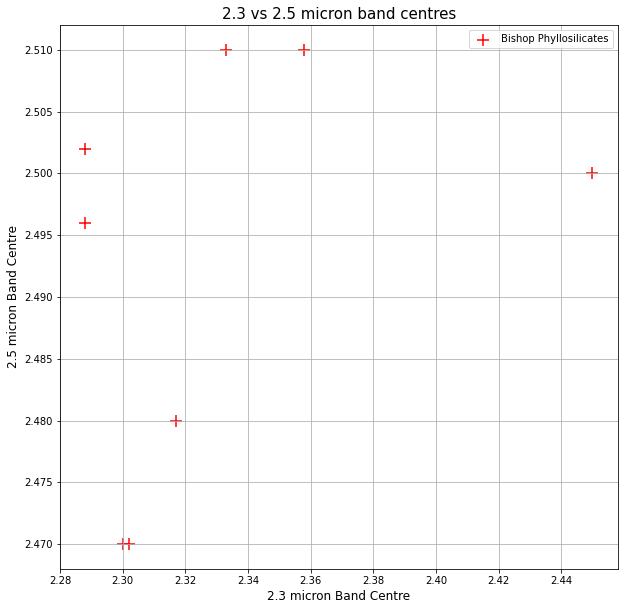

In [8]:
#create a figure and plot the four sets of points
plt.figure(figsize=(10,10))
plt.title("2.3 vs 2.5 micron band centres",fontsize=15)
plt.xlabel("2.3 micron Band Centre",fontsize=12)
plt.ylabel("2.5 micron Band Centre",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plot the library phyllosilicates
plt.scatter(bishopPhyllosilicate23BandCentre,
            bishopPhyllosilicate25BandCentre,
            s=bishopMarkerSize,
            color=phyllosilicateColor,
            marker=bishopMarker,
            label="Bishop Phyllosilicates")
plt.grid(which="both")
plt.legend(loc="best",fontsize=10)

In [9]:
#print all phyllosilicate samples that weren't plotted
print("samples not plotted are:-\n\n")
for i in nonPlottedPhyllosilicateSamples:
    print(f"{i.phyllosilicateSpecies}--\t\t\t\t--{i.phyllosilicateType}--\t\t\t\t--{i.bandCentres}")

samples not plotted are:-


Montmorillonite--				--Montmorillonite--				--[2.217 2.44 ]
Zinnawaldite--				--Mica--				--[2.201 2.255 2.35 ]
Biotite--				--Mica--				--[2.259 2.366]


In [10]:
#print all phyllosilicate samples that weren't plotted
print("samples plotted are:-\n\n")
for i in plottedPhyllosilicateSamples:
    print(f"{i.phyllosilicateSpecies}--\t\t\t\t--{i.phyllosilicateType}--\t\t\t\t--{i.bandCentres}")

samples plotted are:-


Fe-smectite--				--Smectite--				--[2.236 2.288 2.405 2.496]
Nontronite--				--Nontronite--				--[2.288 2.407 2.502]
Kaolinite--				--Kaolinite--				--[2.166 2.211 2.45  2.5  ]
Chrysotile--				--Kaolinite-Serpentine--				--[2.333 2.337 2.51 ]
Clinochlore--				--Chlorite--				--[2.248 2.3   2.331 2.47 ]
Chamosite--				--Chlorite--				--[2.261 2.358 2.51 ]
Celadonite--				--Mica--				--[2.257 2.302 2.348 2.47 ]
Glauconite--				--Mica--				--[2.317 2.366 2.48  2.51 ]
